# Банки — Сегментация клиентов по потреблению продуктов и их оттоку

<b> Проект: </b>
    Одному из лучших банков страны требуется проведение анализа оттока клиентов и сегментирование пользователей продуктов банка с целью разработки стратегии взаимодействия с клиентами на основе аналитических данных.

<b> Предоставленные данные: </b>
    CSV-файл "bank_dataset.csv", содержащий данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

<b> Задачи: </b>
    Анализ клиентов регионального банка и сегментация пользователей по количеству потребляемых продуктов.
1. Проведение исследовательского анализа данных;
2. Сегментация пользователей на основе данных о количестве потребляемых продуктов;
3. Формулировка и проверка статистических гипотез.
    
<b> Результаты исследования: </b>
    Формулировка основных выводов и разработка рекомендаций по повышению качества работы с клиентами:
1. Формулировка выводов по итогам проверки гипотез;
2. Выделение клиентских сегментов; 
3. Разработка мер по снижению оттока.

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import scipy
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

In [2]:
bank = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_11/bank_dataset.csv')

In [3]:
bank.sample(10, random_state = 0)
bank.info()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
9394,15658489,597,Ростов Великий,Ж,35,8,131101.04,1,1,1,192852.67,0
898,15697436,523,Ярославль,Ж,40,2,102967.41,1,1,0,128702.10,1
2398,15676613,706,Рыбинск,Ж,42,8,95386.82,1,1,1,75732.25,0
5906,15788359,788,Ярославль,М,32,4,112079.58,1,0,0,89368.59,0
2343,15808638,706,Ростов Великий,М,38,5,163034.82,2,1,1,135662.17,0
8225,15846878,670,Рыбинск,Ж,57,3,175575.95,2,1,0,99061.75,1
5506,15739764,590,Рыбинск,М,34,0,65812.35,2,0,1,160346.30,0
6451,15765319,636,Рыбинск,Ж,29,6,157576.47,2,1,1,101102.39,0
2670,15803182,598,Ярославль,Ж,64,9,NaN,1,0,1,13181.37,1
3497,15631680,456,Ярославль,Ж,63,1,165350.61,2,0,0,140758.07,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
bank.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


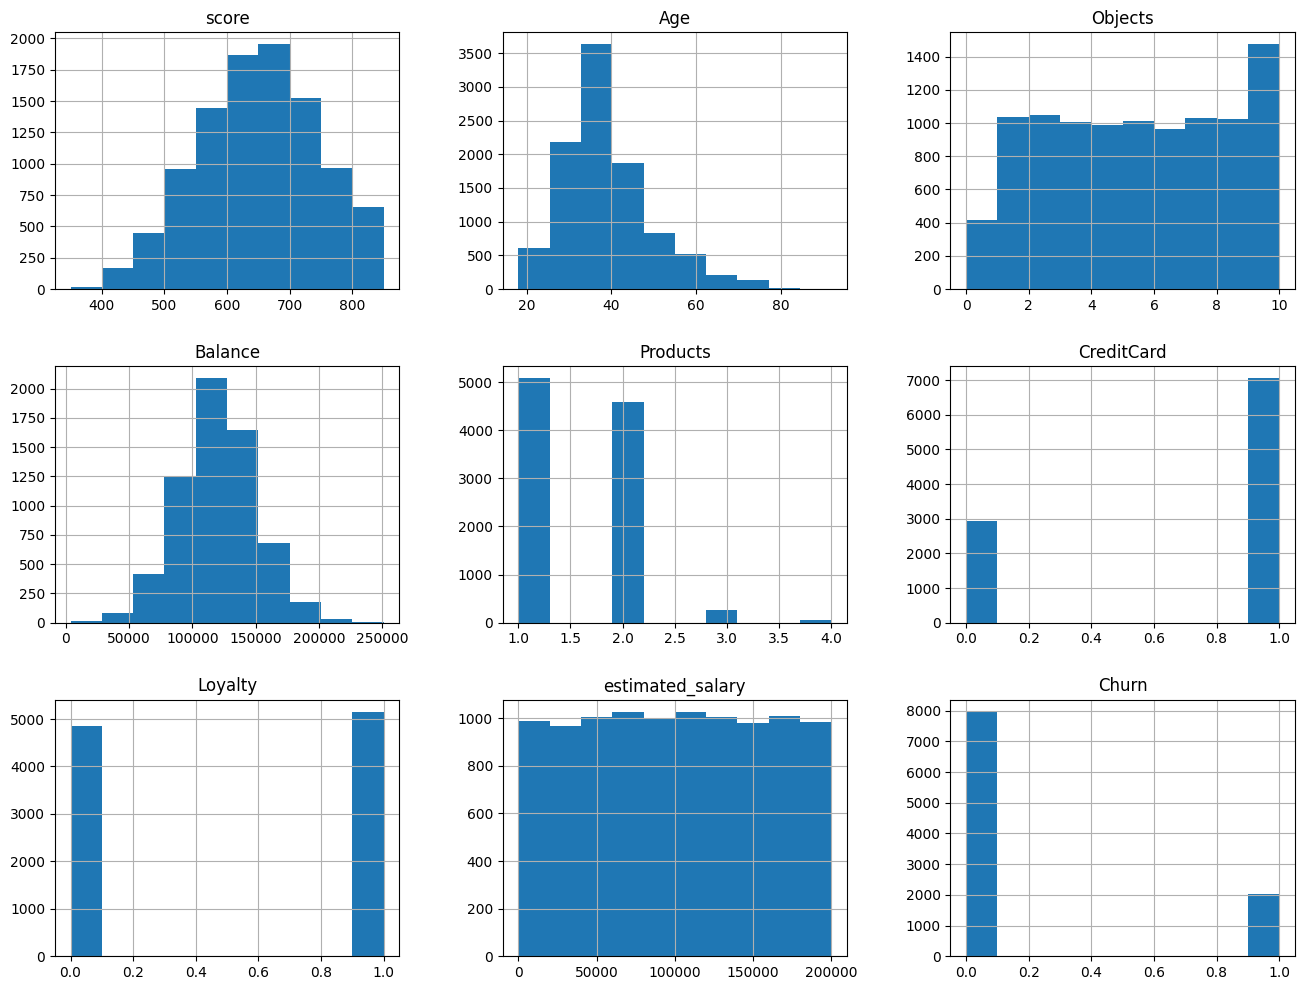

In [5]:
bank.drop('userid', axis=1).hist(figsize= (16,12));

### Вывод

Для исследования у нас имеется таблица, состоящая из 10000 строк и 12 столбцов, содержащая информацию о клиентах Банка. В столбце Balance имеются 3617 незаполненных ячеек (природу их появления изучим в дальнейшем), типы данных соответствуют содержащимся значениям. На первый взгляд аномальные значения отсутствуют. Для удобства можно привести названия столбцов к единому образцу.

## Предобработка и исследование данных

In [6]:
# Для удобства приведем названия столбцов к единому образцу
bank.columns = bank.columns.str.lower()
bank = bank.rename(columns={'creditcard' : 'credit_card'})

In [7]:
# Проверим на наличие дубликатов
bank.duplicated().sum()

0

In [8]:
# Для удобства дальнейшего анализа, переведем категориальные данные о городе и поле в поля с бинарными занчениями
bank_without_categorical = pd.get_dummies(bank)

### Анализ и работа с пропусками в данных о балансе

In [9]:
# Проверим средние значения признаков клиентов с отсутствующими данными о балансе
bank_without_categorical.query('balance.isna()').describe()

,userid,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.0,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236,0.0,0.331490,0.668510,0.457285,0.542715
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195,0.0,0.470814,0.470814,0.498241,0.498241
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### Комментарий
Средние значения клиентов с пропусками в балансе не имеют ярких особенностей, отсутствуют аномалии на которые можно было бы обратить внимание. Можно лишь обратить внимание на то, что в Ростове Великом у всех клиентов есть информация о балансе, а вот больше половины Ярославских клиентов информации о балансе в анкете не имеют.

In [10]:
# Создадим таблицу, исключив из нее строки с пропусками
filled_bank = bank_without_categorical.query('balance.notnull()')

In [11]:
# Сравним значения таблиц
bank_without_categorical.describe().round(2)
filled_bank.describe().round(2)

,userid,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.0,10000.00,10000.00
mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.2,0.25,0.25,0.5,0.45,0.55
std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.4,0.43,0.43,0.5,0.50,0.50
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0,0.00,0.00,0.0,0.00,0.00
25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.0,0.00,0.00,0.0,0.00,0.00
50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.92,0.0,0.00,0.00,1.0,0.00,1.00
75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.0,1.00,0.00,1.0,1.00,1.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0,1.00,1.00,1.0,1.00,1.00


,userid,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
count,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.0,6383.00,6383.00,6383.00
mean,15733104.80,651.14,39.20,4.98,119827.49,1.39,0.70,0.51,100717.35,0.24,0.39,0.2,0.41,0.45,0.55
std,71929.13,96.93,10.48,2.91,30095.06,0.58,0.46,0.50,57380.32,0.43,0.49,0.4,0.49,0.50,0.50
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00,0.00,0.0,0.00,0.00,0.00
25%,15670940.00,584.00,32.00,2.00,100181.98,1.00,0.00,0.00,51736.85,0.00,0.00,0.0,0.00,0.00,0.00
50%,15732262.00,652.00,38.00,5.00,119839.69,1.00,1.00,1.00,101139.30,0.00,0.00,0.0,0.00,0.00,1.00
75%,15795842.00,718.00,44.00,8.00,139512.29,2.00,1.00,1.00,149596.62,0.00,1.00,0.0,1.00,1.00,1.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199970.74,1.00,1.00,1.0,1.00,1.00,1.00


#### Комментарий
Средние и медианные у двух таблиц практически одинаковы.

<AxesSubplot: title={'center': 'score'}, ylabel='Frequency'>

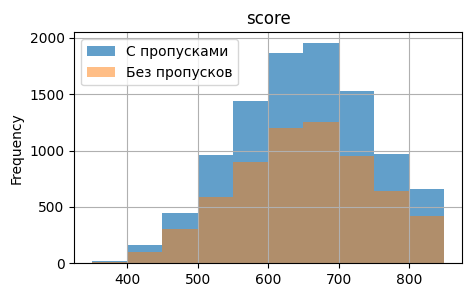

<AxesSubplot: title={'center': 'age'}, ylabel='Frequency'>

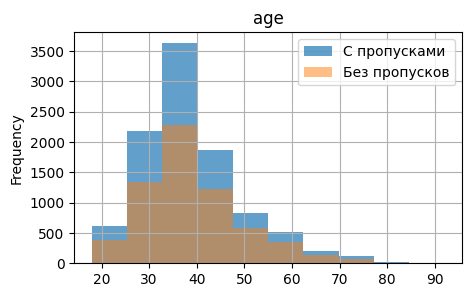

<AxesSubplot: title={'center': 'objects'}, ylabel='Frequency'>

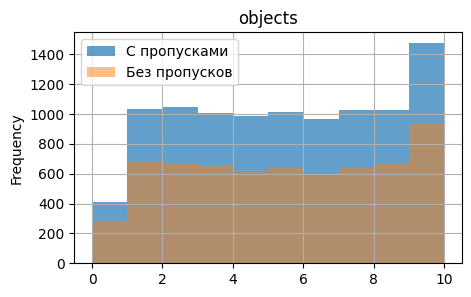

<AxesSubplot: title={'center': 'products'}, ylabel='Frequency'>

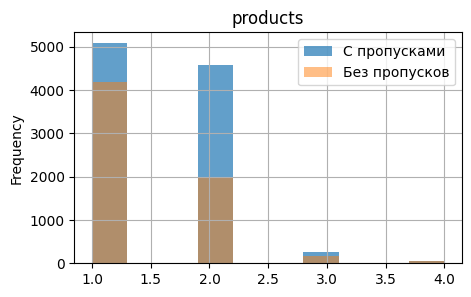

<AxesSubplot: title={'center': 'credit_card'}, ylabel='Frequency'>

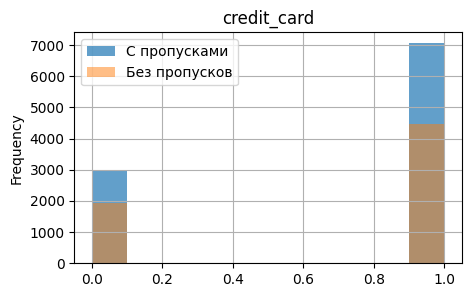

<AxesSubplot: title={'center': 'loyalty'}, ylabel='Frequency'>

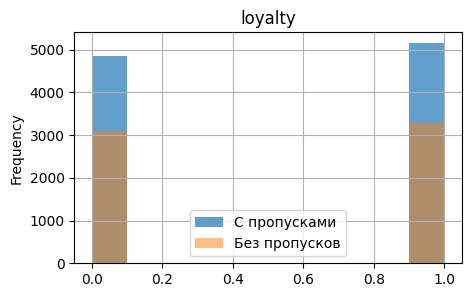

<AxesSubplot: title={'center': 'estimated_salary'}, ylabel='Frequency'>

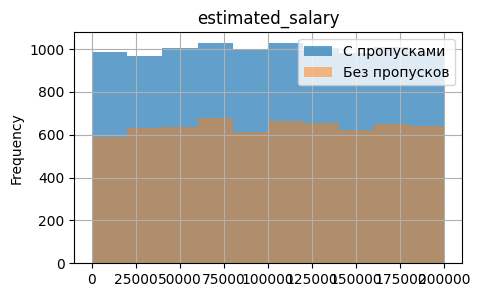

<AxesSubplot: title={'center': 'churn'}, ylabel='Frequency'>

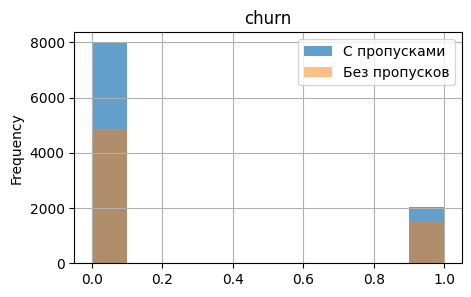

In [12]:
# Построим графики распределения числовых значений для двух таблиц
for col in bank.select_dtypes(include=np.number).drop(['userid', 'balance'], axis=1).columns:
    ax = bank.plot(kind='hist', y=col, 
    alpha=0.7, label='С пропусками', figsize = (5,3), title=col)
    filled_bank.plot(kind='hist', y=col,
    alpha=0.5, label='Без пропусков', ax=ax, grid=True, legend=True)
    plt.show();

#### Комментарий
Визуально данные в двух таблицах распределены пропорционально друг к другу. Аномальных значений или исключительных признаков, присущих тому или иному датафрейму, не выявлено.

#### Вывод

Сравнив данные клиентов, у которых отсутствует информация о балансе с данными всех клиентов, значимых различий в их распределении мы не заметили. Из этого можно сделать вывод, что клиенты с отсутствующим балансом не являются определенной категорией клиентов (по крайней мере исходя из имеющихся признаков) с присущими им исключительными признаками или особенностями. Во избежание искажения данных мы не будем заполнять пропуски какими-либо значениями, а при необходимости будем пользоваться выборкой из 6383 строк с заполненными данными. Несмотря на это, можно предположить, что у работников офисов, расположенных в Ярославле, имеются проблемы со сбором информации о балансе клиента. Если это действительно так, то для работников из Ярославля стоит провести соответствующие занятия на основе опыта Ростовских коллег, у которых со сбором информации проблем нет.

## Исследовательский анализ данных (EDA)

### Анализ оттока клиентов

In [13]:
bank.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

#### Комментарий
Ушедшие клиенты составляют лишь пятую часть всей выборки (2037).

In [14]:
# Сгруппируем по оттоку и посмотрим на средние значения
bank_without_categorical.drop('userid', axis=1).groupby('churn').mean().T.round(2)

churn,0,1
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,119535.86,120746.97
products,1.54,1.48
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,99738.39,101465.68
city_Ростов Великий,0.21,0.40
city_Рыбинск,0.26,0.20


#### Комментарий
Из явных различий двух групп можно отметить средний возраст ушедших - 45 лет к 37 годам у оставшихся и активность ушедших - 0.36 к 0.55 у оставшихся пользователей. Также клиенты из Ростова Великого попадают в отток чаще клиентов из других городов. Остальные признаки значимых различий не имеют.

<AxesSubplot: title={'center': 'score'}, ylabel='Frequency'>

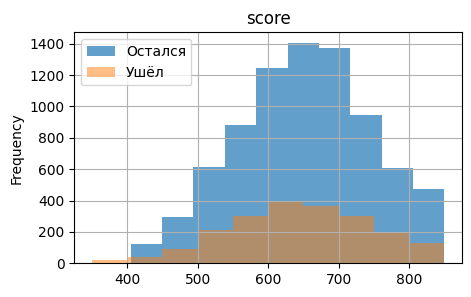

<AxesSubplot: title={'center': 'age'}, ylabel='Frequency'>

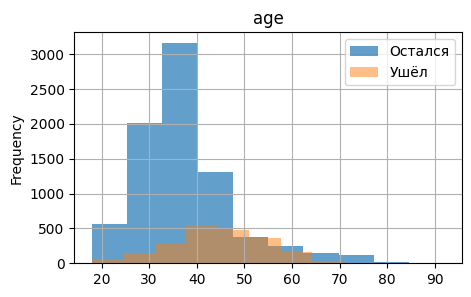

<AxesSubplot: title={'center': 'objects'}, ylabel='Frequency'>

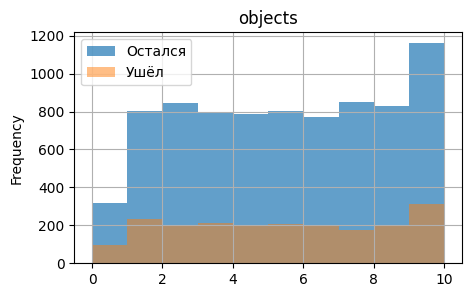

<AxesSubplot: title={'center': 'balance'}, ylabel='Frequency'>

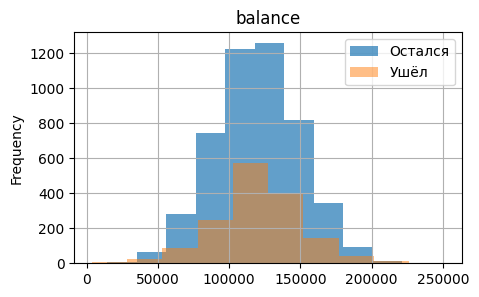

<AxesSubplot: title={'center': 'products'}, ylabel='Frequency'>

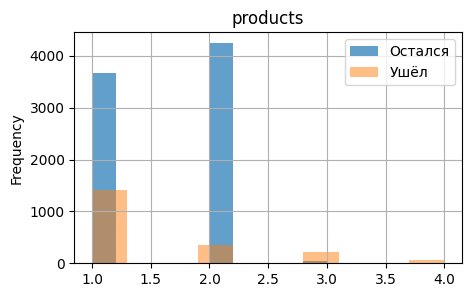

<AxesSubplot: title={'center': 'credit_card'}, ylabel='Frequency'>

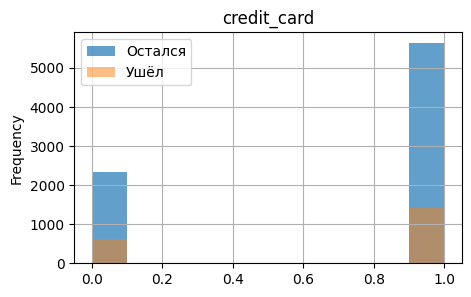

<AxesSubplot: title={'center': 'loyalty'}, ylabel='Frequency'>

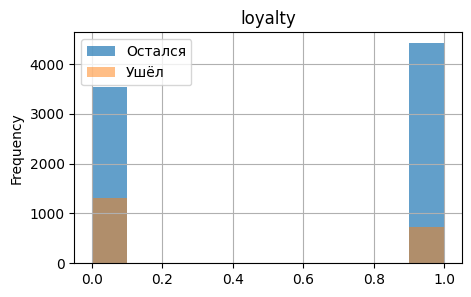

<AxesSubplot: title={'center': 'estimated_salary'}, ylabel='Frequency'>

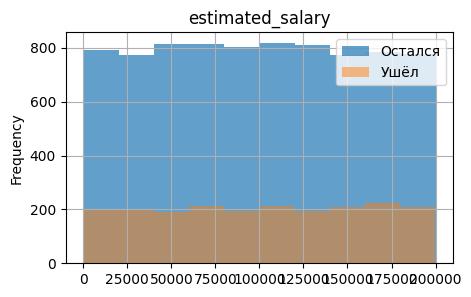

In [15]:
# В цикле прогоним названия столбцов (признаки) и по каждому построим графики для ушедших и оставшихся
for col in bank.select_dtypes(include=np.number).drop(['userid', 'churn'], axis=1).columns:
    ax = bank.query('churn == 0').plot(kind='hist', y=col, 
    alpha=0.7, label='Остался', figsize = (5,3), title=col)
    bank.query('churn == 1').plot(kind='hist', y=col,
    alpha=0.5, label='Ушёл', ax=ax, grid=True, legend=True)
    plt.show();

#### Комментарий
На графиках, помимо уже перечисленных ранее различий двух групп, также можно обратить внимание на то, что ушедшие чаще пользовались тремя продуктами банка и исключительно они пользовалась четырьмя продуктами, хотя подавляющее их большинство пользовались одним продуктом в отличие от клиентов, которые остались.

### Анализ клиентского потребления продуктов

In [16]:
bank.products.value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

#### Комментарий
3 и 4 продукта одновременно используют крайне мало клиентов. Клиенты, пользующиеся 1-м и 2-мя продуктами разделились почти поровну - 5084 и 4590 соответственно.

In [17]:
# Сгруппируем по количеству используемых продуктов и посмотрим на средние значения
bank_without_categorical.drop('userid', axis=1).groupby('products').mean().T.round(2)

products,1,2,3,4
score,649.12,652.19,648.11,653.58
age,39.67,37.75,43.20,45.68
objects,4.97,5.05,5.00,5.30
balance,119894.16,119660.94,119475.69,122260.61
credit_card,0.70,0.71,0.71,0.68
loyalty,0.50,0.53,0.42,0.48
estimated_salary,99487.26,100452.01,104318.13,104763.72
churn,0.28,0.08,0.83,1.00
city_Ростов Великий,0.27,0.23,0.36,0.40
city_Рыбинск,0.24,0.26,0.25,0.12


#### Комментарий
Сгруппировав данные по количеству потребляемых продуктов, пожалуй можно обратить внимание на более старший возраст тех, кто пользуется 3-мя и 4-мя продуктами (43 и 46 лет соответственно), меньшую активность и более высокий отток этих двух групп.

<AxesSubplot: title={'center': 'score'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'score'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'score'}, ylabel='Frequency'>

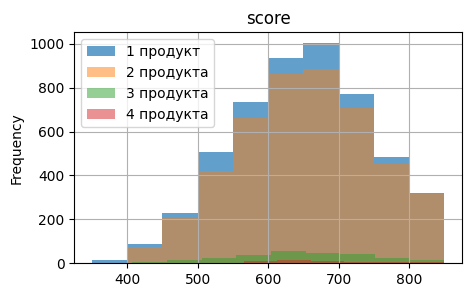

<AxesSubplot: title={'center': 'age'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'age'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'age'}, ylabel='Frequency'>

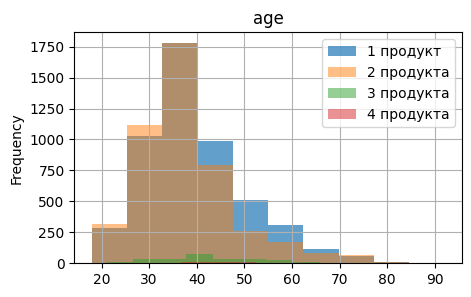

<AxesSubplot: title={'center': 'objects'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'objects'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'objects'}, ylabel='Frequency'>

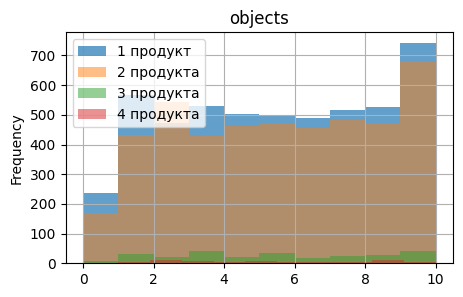

<AxesSubplot: title={'center': 'balance'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'balance'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'balance'}, ylabel='Frequency'>

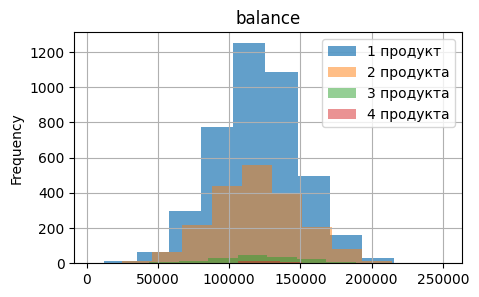

<AxesSubplot: title={'center': 'products'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'products'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'products'}, ylabel='Frequency'>

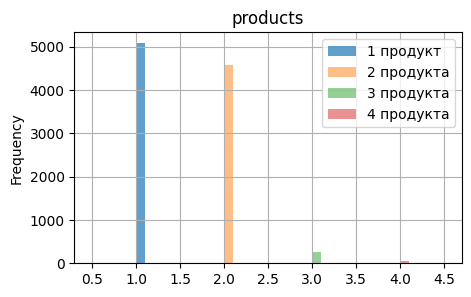

<AxesSubplot: title={'center': 'credit_card'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'credit_card'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'credit_card'}, ylabel='Frequency'>

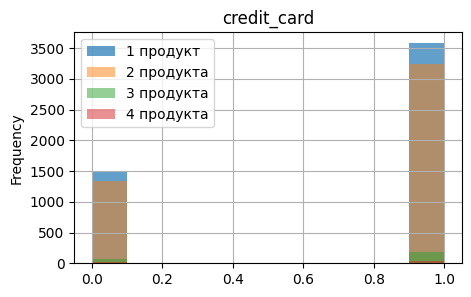

<AxesSubplot: title={'center': 'loyalty'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'loyalty'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'loyalty'}, ylabel='Frequency'>

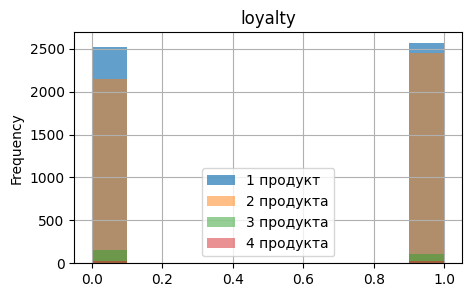

<AxesSubplot: title={'center': 'estimated_salary'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'estimated_salary'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'estimated_salary'}, ylabel='Frequency'>

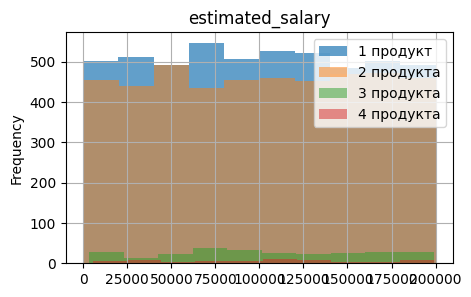

<AxesSubplot: title={'center': 'churn'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'churn'}, ylabel='Frequency'>

<AxesSubplot: title={'center': 'churn'}, ylabel='Frequency'>

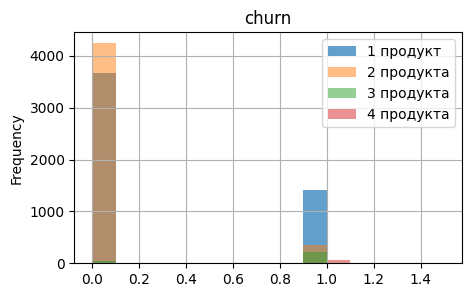

In [18]:
# Аналогично построим графики по признакам пользоваетелей взависимости от кол-ва продуктов
for col in bank.select_dtypes(include=np.number).drop('userid', axis=1).columns:
    ax = bank.query('products == 1').plot(kind='hist', y=col, 
    alpha=0.7, label='1 продукт', figsize = (5,3), title=col)
    bank.query('products == 2').plot(kind='hist', y=col,
    alpha=0.5, label='2 продукта', ax=ax, grid=True, legend=True)
    bank.query('products == 3').plot(kind='hist', y=col,
    alpha=0.5, label='3 продукта', ax=ax, grid=True, legend=True)
    bank.query('products == 4').plot(kind='hist', y=col,
    alpha=0.5, label='4 продукта', ax=ax, grid=True, legend=True)
    plt.show();

#### Комментарий
Визуализация результатов, полученных ранее, также выявляет признаки, различающиеся между группами. Наверное главное, на что стоит обратить внимание это более старший возраст и отток клиентов, пользовавшихся 3-мя и 4-мя продуктами одновременно.

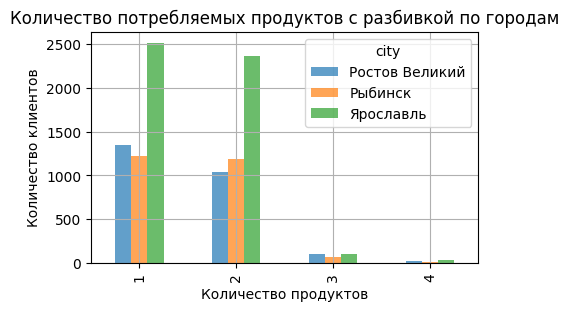

In [19]:
city_products = bank.pivot_table(index='products', columns='city', values='userid', aggfunc='count').reset_index()
city_products.plot(kind="bar",x='products', stacked=False, grid=True, figsize=(5, 3), alpha=0.7)

plt.title('Количество потребляемых продуктов с разбивкой по городам')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов');

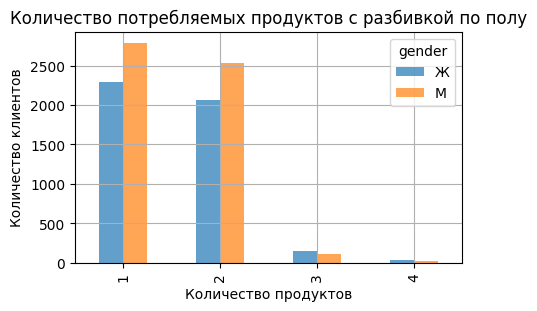

In [20]:
gender_products = bank.pivot_table(index='products', columns= 'gender', values='userid', aggfunc='count').reset_index()
gender_products.plot(kind="bar",x='products', stacked=False, grid=True, figsize=(5, 3), alpha=0.7)

plt.title('Количество потребляемых продуктов с разбивкой по полу')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов');

### Корреляция признаков

In [21]:
# Построим матрицу корреляций
cm = bank.corr()

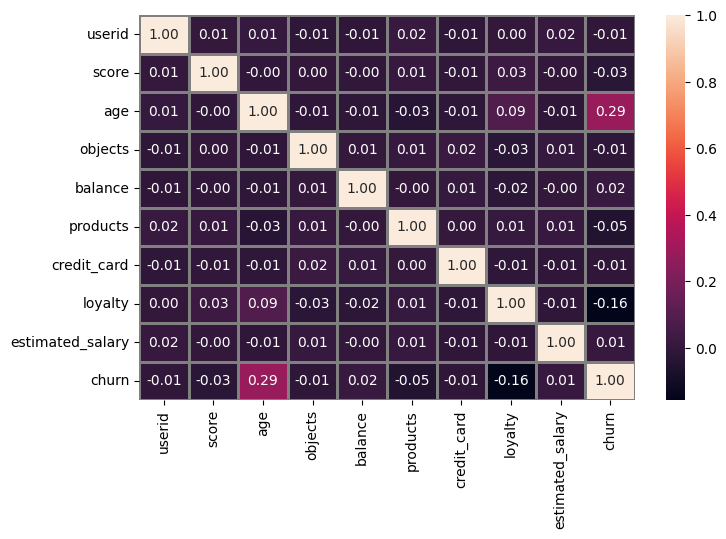

In [22]:
# Визуализируем тепловую карту с подписями для матрицы корреляций
fig = plt.subplots(figsize=(8,5)) 
sns.heatmap(cm, annot = True, fmt='.2f', linewidths=1, linecolor='gray')

plt.show();

#### Вывод
Явных признаков, коррелирующих с оттоком клиентов или количеством используемых продуктов на матрице к сожалению не выявлено. Среди всех слабых зависимостей, лидером по взаимодействию с оттоком оказался возрастной признак (0.29).

In [23]:
phikcm = bank.drop('userid', axis=1).phik_matrix()

interval columns not set, guessing: ['score', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn']


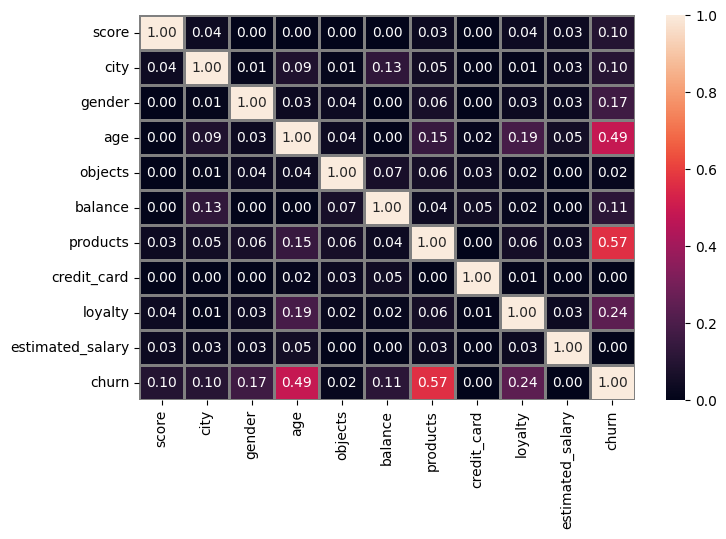

In [24]:
fig = plt.subplots(figsize=(8,5)) 
sns.heatmap(phikcm, annot = True, fmt='.2f', linewidths=1, linecolor='gray')

plt.show();

### Вывод

Проведя разведочный анализ основных свойств данных, мы убедились в отсутствии аномальных значений, нормальном распределении данных, а также установили в них некоторые слабые закономерности, благодаря которым можно сформировать первые гипотезы и построить предварительные прогнозы по предрасположенности к оттоку и выбору определенного количества продуктов у некоторых групп клиентов.

## Сегментация клиентов по количеству используемых продуктов

### Построение матрицы расстояний и ее визуализация

In [25]:
# В таблице без пропусков представим категориальные данные о поле и городе множеством бинарных полей
copy_filled_bank = pd.get_dummies(filled_bank)
copy_filled_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 1 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userid               6383 non-null   int64  
 1   score                6383 non-null   int64  
 2   age                  6383 non-null   int64  
 3   objects              6383 non-null   int64  
 4   balance              6383 non-null   float64
 5   products             6383 non-null   int64  
 6   credit_card          6383 non-null   int64  
 7   loyalty              6383 non-null   int64  
 8   estimated_salary     6383 non-null   float64
 9   churn                6383 non-null   int64  
 10  city_Ростов Великий  6383 non-null   uint8  
 11  city_Рыбинск         6383 non-null   uint8  
 12  city_Ярославль       6383 non-null   uint8  
 13  gender_Ж             6383 non-null   uint8  
 14  gender_М             6383 non-null   uint8  
dtypes: float64(2), int64(8), uint8(5)
memo

In [26]:
# Уберем целевую переменную
X = copy_filled_bank.drop('products', axis=1)

In [27]:
# Стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# Создадим таблицу связок между объектами
linked = linkage(X_sc, method = 'ward') 

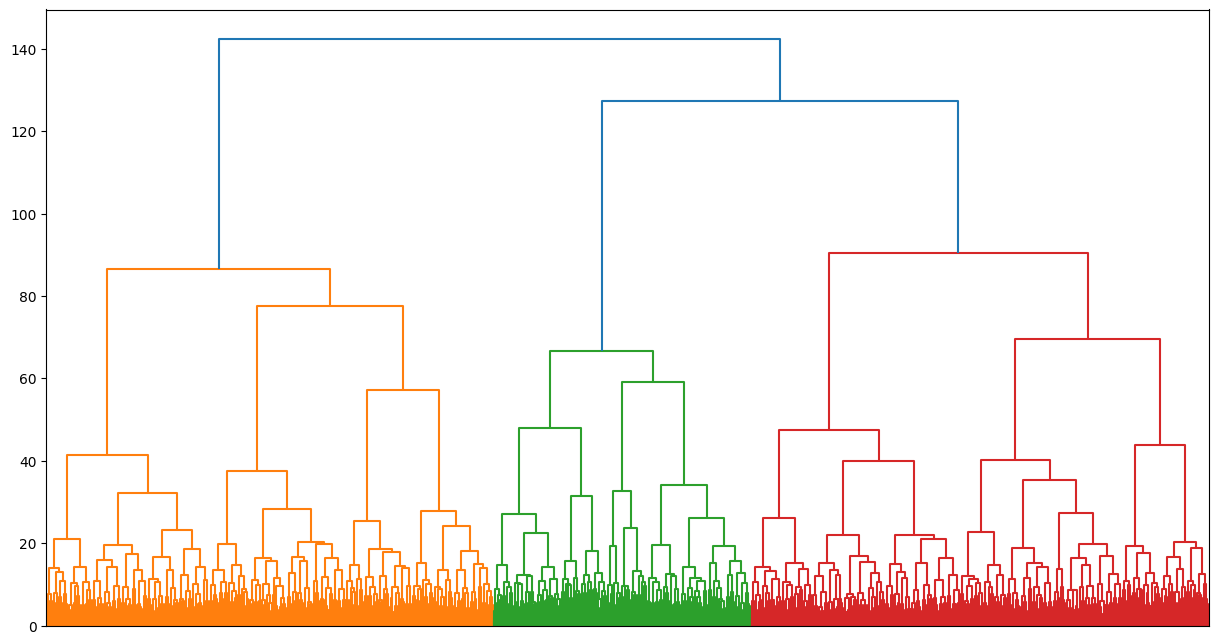

In [28]:
# Построим дендрограмму
plt.figure(figsize=(15, 8))  
dendrogram(linked, orientation='top', no_labels=True)
plt.show();

#### Вывод
Исходя из визуализации агломеративной кластеризации, получаем оптимальное число кластеров, предложенное алгоритмом - 3. Данное число кластеров и предложим алгоритму KMeans.

### Кластеризация на основании алгоритма K-Means

In [29]:
# Задаём модель k_means с числом кластеров, равным 3
km = KMeans(n_clusters = 3, random_state=0)
# Прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

In [30]:
# Создадим в таблице столбец с присвоенным номером кластера и сгруппируем по нему данные, получив их средние значения
copy_filled_bank['cluster'] = labels
bank_grouped_by_cluster = copy_filled_bank.groupby('cluster').mean().reset_index()
bank_grouped_by_cluster.drop(['cluster', 'userid'], axis=1).T.round(2)

,0,1,2
score,651.45,650.90,651.00
age,39.77,38.61,39.26
objects,5.01,4.95,4.98
balance,119730.12,119927.77,119814.99
products,1.52,1.30,1.30
credit_card,0.71,0.69,0.68
loyalty,0.50,0.51,0.55
estimated_salary,101113.44,100625.03,100127.28
churn,0.32,0.18,0.20
city_Ростов Великий,1.00,0.00,0.00


<AxesSubplot: title={'center': 'score'}>

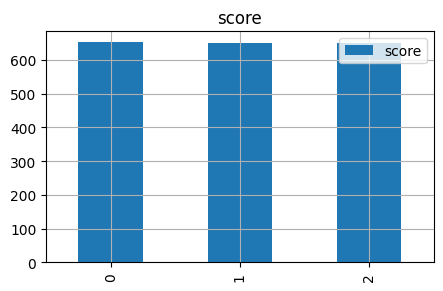

<AxesSubplot: title={'center': 'age'}>

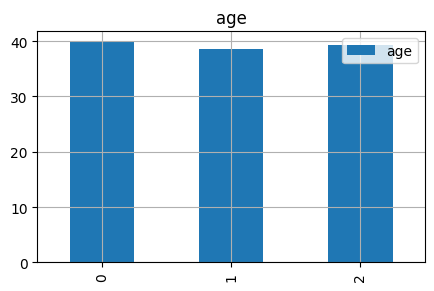

<AxesSubplot: title={'center': 'objects'}>

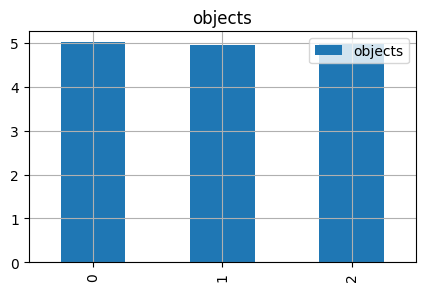

<AxesSubplot: title={'center': 'balance'}>

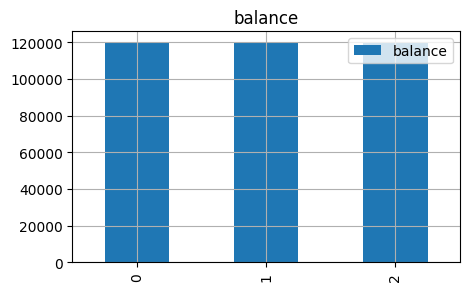

<AxesSubplot: title={'center': 'products'}>

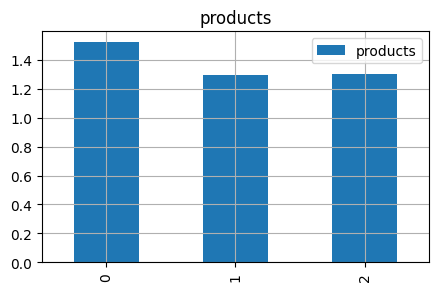

<AxesSubplot: title={'center': 'credit_card'}>

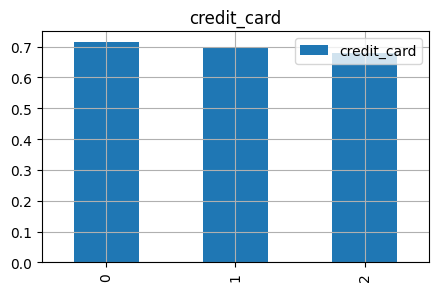

<AxesSubplot: title={'center': 'loyalty'}>

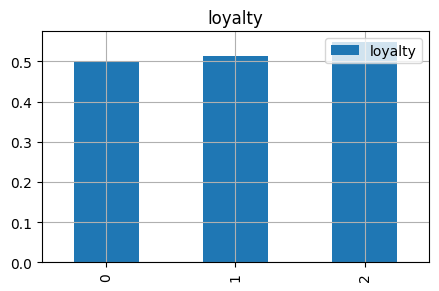

<AxesSubplot: title={'center': 'estimated_salary'}>

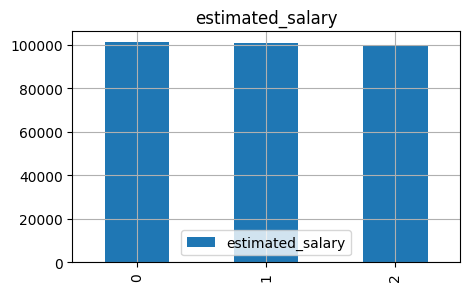

<AxesSubplot: title={'center': 'churn'}>

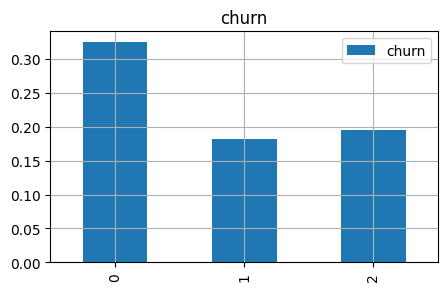

<AxesSubplot: title={'center': 'city_Ростов Великий'}>

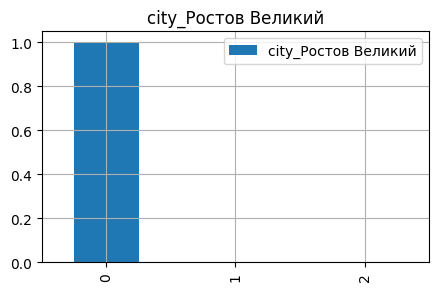

<AxesSubplot: title={'center': 'city_Рыбинск'}>

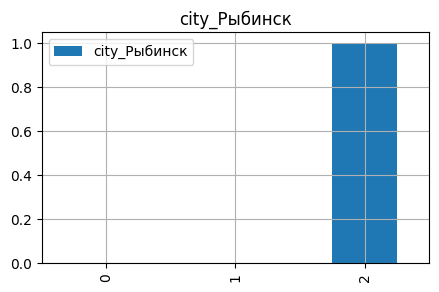

<AxesSubplot: title={'center': 'city_Ярославль'}>

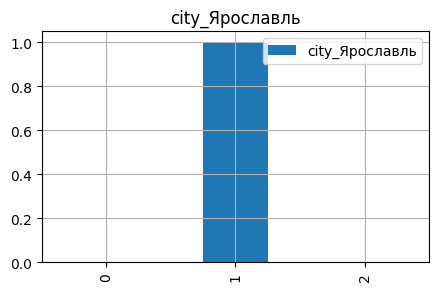

<AxesSubplot: title={'center': 'gender_Ж'}>

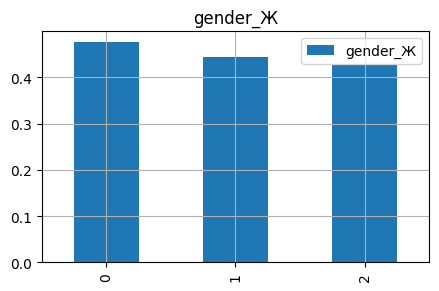

<AxesSubplot: title={'center': 'gender_М'}>

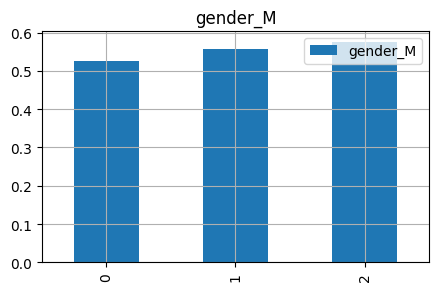

In [31]:
# В цикле построим графики для всех признаков с разбиением на кластеры
for col in bank_grouped_by_cluster.drop(['cluster', 'userid'], axis=1).columns:
    bank_grouped_by_cluster.plot.bar(y=col, figsize = (5,3), title=col, grid=True)
    plt.show()

#### Вывод
Визуализация показателей кластеров продемонстрировала отсутствие явных различий между группами, полученными с помощью алгоритма k_means. В среднем клиенты пользуются одинаковым количеством банковских продуктов.

### Вывод

Как уже было выявлено ранее, на этапе исследовательского анализа данных, клиенты из представленной выборки не имеют ярко выраженных различий. Ни работа "вручную" путем группировки данных, ни кластеризация при помощи алгоритма K_means не позволили нам выявить признаки присущие той или иной группе клиентов, что еще раз подтвердило правильность низких показателей матрицы корреляции признаков. Незначительная взаимосвязь прослеживается лишь среди более возрастной группы клиентов, которая пользуется бОльшим количеством продуктов, при этом проявляет меньшую активность и чаще попадает в отток. Попробуем, исходя из этой информации, сформировать соответствующие гипотезы.

## Проверка гипотез

In [32]:
def shapiro_test(sample_1, sample_2):
    
    p_value_1 = st.shapiro(sample_1)[1]
    p_value_2 = st.shapiro(sample_2)[1]

    alpha = 0.05
    
    print('Выборка 1')
    print('p-значение: ', p_value_1)
    if p_value_1 < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 
    print('-------------------------------------------------------')
    print('Выборка 2')
    print('p-значение: ', p_value_2)
    if p_value_2 < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

### Комментарий
Создадим функцию проверки данных на нормальность при помощи критерия Шапиро-Уилка. Для удобства будем проводить проверку сразу двух выборок.

### Гипотеза 1: "Доходы клиентов, которые пользуются двумя продуктами банка, и доходы клиентов, которые пользуются одним различны".

H₀ - Доходы клиентов, которые пользуются двумя продуктами банка, и доходы клиентов, которые пользуются одним не различаются.

H₁ - Доходы клиентов, которые пользуются двумя продуктами банка, и доходы клиентов, которые пользуются одним различны.

In [33]:
# Создадим выборки для сравнения зарплат клиентов с одним и двумя продуктами
one_product = bank.query('products == 1')['estimated_salary']
two_products = bank.query('products == 2')['estimated_salary']

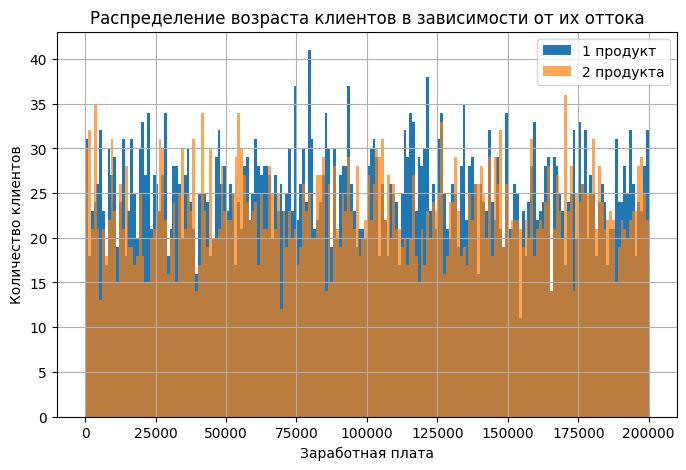

In [34]:
# Визуализируем распределения данных в указанных выборках
one_product.plot(kind='hist', bins=200, label='1 продукт', figsize = (8,5), legend=True)
two_products.plot(kind='hist',bins=200, alpha=0.7, label='2 продукта', grid=True, legend=True)

plt.title('Распределение возраста клиентов в зависимости от их оттока')
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов');
plt.show();

In [35]:
shapiro_test(one_product, two_products)

Выборка 1
p-значение:  3.016880709638032e-36
Отвергаем нулевую гипотезу: распределение не нормально
-------------------------------------------------------
Выборка 2
p-значение:  2.1693455518781312e-35
Отвергаем нулевую гипотезу: распределение не нормально


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Комментарий
Проведенной проверкой установленно, что данные распределены не нормально, в связи с чем, для сравнения выборок, используем непараметрический тест Уилкоксона-Манна-Уитни.

In [36]:
alpha = 0.05

results = st.mannwhitneyu(one_product, two_products)
print('средний доход клиентов, пользующихся одним продуктом: {:.0f}'.format(one_product.mean()))
print('средний доход клиентов, пользующихся двумя продуктами: {:.0f}'.format(two_products.mean()))
print()
print('p-значение: {:.10f}'.format(results.pvalue))
print()
if alpha > results.pvalue:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

средний доход клиентов, пользующихся одним продуктом: 99487
средний доход клиентов, пользующихся двумя продуктами: 100452

p-значение: 0.4079566652

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


#### Вывод
p-значение выше критического уровня статистической значимости, что говорит нам об отсутствии статистически значимых различий в двух совокупностях, в связи с чем, отвергнуть нулевую гипотезу не представляется возможным. Доходы клиентов, которые пользуются двумя продуктами банка, и доходы клиентов, которые пользуются одним не различаются.

### Гипотеза 2: "Средний возраст ушедших клиентов и оставшихся различен".

H₀ - Средний возраст ушедших и оставшися клиентов не различается.

H₁ - Средний возраст ушедших и оставшися клиентов имеет различия.

In [37]:
remaining_client_age = bank.query('churn == 0')['age']
churn_client_age = bank.query('churn == 1')['age']

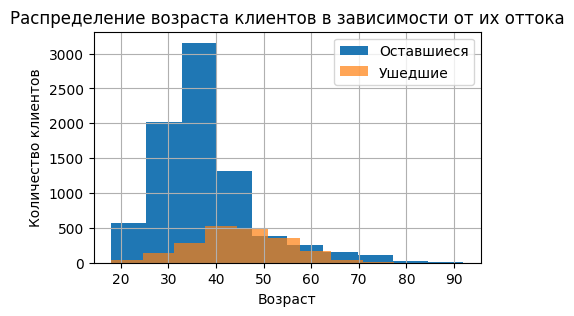

In [38]:
ax = remaining_client_age.plot(kind='hist', label='Оставшиеся', figsize = (5,3), legend=True)
churn_client_age.plot(kind='hist',alpha=0.7, label='Ушедшие', ax=ax, grid=True, legend=True)

plt.title('Распределение возраста клиентов в зависимости от их оттока')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов');
plt.show();

In [39]:
shapiro_test(remaining_client_age, churn_client_age)

Выборка 1
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
-------------------------------------------------------
Выборка 2
p-значение:  0.005863629747182131
Отвергаем нулевую гипотезу: распределение не нормально


In [40]:
alpha = 0.05
results = st.mannwhitneyu(remaining_client_age, churn_client_age)

print('средний возраст действующих клиентов: {:.0f}'.format(remaining_client_age.mean()))
print('средний возраст ушедших клиентов: {:.0f}'.format(churn_client_age.mean()))
print()
print('p-значение: {:.10f}'.format(results.pvalue))
print()
if alpha > results.pvalue:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

средний возраст действующих клиентов: 37
средний возраст ушедших клиентов: 45

p-значение: 0.0000000000

Отвергаем нулевую гипотезу: разница статистически значима


#### Вывод
p-значение ниже критического уровня статистической значимости, что говорит нам о наличии различий в двух совокупностях, в связи с чем, нулевая гипотеза отвергается. Средний возраст ушедших клиентов - 45, оставшихся - 37 (разница ощутима).

### Вывод

Проверив выдвинутые перед исследованием гипотезы, делаем следующие выводы:
   - Доходы клиентов, которые пользуются двумя продуктами банка, и доходы клиентов, которые пользуются одним не различаются;
   - Средний возраст действующих и ушедших клиентов различается. В отток попадают клиенты со средним возрастом - 45 лет, когда средний возраст действующего клиента - 37 лет.

## Общий вывод и рекомендации бизнесу

<b>1. Сегментация по продуктовому потреблению:</b>

<b> - Признаки, присущие клиентам с 1 продуктом (51%):</b>
В половине случаев - клиенты из Ярославля, в среднем 39-40 лет, в 70% - имеющие кредитную карту, всего около четверти их попало в отток;

<b> - Признаки, присущие клиентам с 2 продуктами (46%):</b>
В половине случаев - клиенты из Ярославля, в среднем 37-38 лет, в 70% - имеющие кредитную карту, являются самыми активными клиентами с самым низким числом оттока - 7.6%;

<b> - Признаки, присущие клиентам с 3-4 продуктами (3%):</b>
Немного чаще это женщины (56% и 63% соответственно продуктам), почти поровну из Ярославля и Ростова Великого, имеют самые высокие доходы, низкую активность и громадный отток (83% и 100%), в сравнении с остальными сегментами.
__________________________________________________________________________________________________________________
<b>2. Сегментация по оттоку:</b>

<b> - Признаки, присущие лояльным клиентам:</b>
Мужчины из Ярославля, в среднем 38-40 лет, пользующиеся 2-мя банковскими продуктами, являются более лояльными клиентами.

<b> - Признаки, присущие ушедшим клиентам:</b>
Женщины со средним возрастом 43-45 лет из Ростова Великого, пользовавшиеся 3-4 продуктами Банка, проявляющие более низкую клиентскую активность, чаще остальных уходят в отток.

__________________________________________________________________________________________________________________
<b>3.Рекомендации бизнесу:</b>
1. Для проведения последующих исследований, имеется необходимость сбора более подробной информации о:
    - клиентах банка (место работы (учебы), должность, семейное положение, образование, как долго является клиентом, какими продуктами за это время пользовался и пользуется в настоящее время, при оформлении кредитов - суммы займов и цели);
    - банковских продуктах(необходимо более детальное раскрытие каждого продукта для качественного анализа взаимодействия клиентов с ними и влияния определенного набора продуктов на отток).
2. Возможно в Ярославле имеются проблемы со сбором информации о балансе клиентов, необходимо разобраться с причинами большого количества пропусков.
3. Анализ с использованием большего количества данных клиентской активности и взаимодейтсвия с продуктами Банка в Ростове Великом, где отток выше, чем в других городах.
4. Необходимо изучение продуктов, которыми пользовались ушедшие клиенты. Анализ обратной связи от ушедших клиентов поможет в данном вопросе.
5. Увеличение маркетинговых затрат на привлечение групп граждан старше 40 лет, а также действующих клиентов, с падающей пользовательской активностью.
6. Пересмотр или внедрение программы кэшбека, с повышенной ставкой за приобретение товаров и услуг, пользующихся спросом у женщин и клиентов старше 40 лет (клиенты, склонные к оттоку).